<a href="https://colab.research.google.com/github/saish23/Deep-Learning-Projects-/blob/main/Fake_News_Prediction_using_NLP_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 83% 34.0M/41.0M [00:00<00:00, 107MB/s] 
100% 41.0M/41.0M [00:00<00:00, 100MB/s]


In [2]:
import zipfile

zip_ref = zipfile.ZipFile('/content/fake-and-real-news-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import pandas as pd

true_df = pd.read_csv('/content/True.csv')

fake_df = pd.read_csv('/content/Fake.csv')

fake_df['Label'] = "Fake"

true_df['Label'] = "True"

In [22]:
true_df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [23]:
fake_df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [24]:
df = pd.concat([fake_df, true_df], axis=0)
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [25]:
print("Shape of fake_df: " , fake_df.shape)

Shape of fake_df:  (23481, 5)


In [26]:
print("Shape of true_df: " ,true_df.shape)

Shape of true_df:  (21417, 5)


In [27]:
print("Shape of df: " ,df.shape)

Shape of df:  (44898, 5)


In [28]:
df

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [29]:
df = df.drop(['title', 'subject', 'date'], axis=1)
df.head()

,text,Label
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake


In [30]:
df['Label'].value_counts()

Fake    23481
True    21417
Name: Label, dtype: int64

In [31]:
df['label_encode'] = df['Label'].map({'Fake':0, 'True':1})

In [32]:
df.head()

,text,Label,label_encode
0,Donald Trump just couldn t wish all Americans ...,Fake,0
1,House Intelligence Committee Chairman Devin Nu...,Fake,0
2,"On Friday, it was revealed that former Milwauk...",Fake,0
3,"On Christmas day, Donald Trump announced that ...",Fake,0
4,Pope Francis used his annual Christmas Day mes...,Fake,0


In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub('<.*?>', '', text)

    # Remove special characters and punctuation
    cleaned_text = re.sub('[^a-zA-Z0-9]', ' ', cleaned_text)

    # Tokenization
    tokens = word_tokenize(cleaned_text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens)

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    return cleaned_text

# Example usage
text = "<p>I am running a marathon and enjoying the beautiful weather!</p>"
cleaned_text = clean_text(text)
print(cleaned_text)


running marathon enjoying beautiful weather


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [35]:
df.drop(columns='text',inplace = True)

df.head()

,Label,label_encode,cleaned_text
0,Fake,0,donald trump wish americans happy new year lea...
1,Fake,0,house intelligence committee chairman devin nu...
2,Fake,0,friday revealed former milwaukee sheriff david...
3,Fake,0,christmas day donald trump announced would bac...
4,Fake,0,pope francis used annual christmas day message...


In [36]:
df['cleaned_text']

0        donald trump wish americans happy new year lea...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
21412    brussels reuters nato ally tuesday welcomed pr...
21413    london reuters lexisnexis provider legal regul...
21414    minsk reuters shadow disused soviet era factor...
21415    moscow reuters vatican secretary state cardina...
21416    jakarta reuters indonesia buy 11 sukhoi fighte...
Name: cleaned_text, Length: 44898, dtype: object

In [40]:
from nltk.probability import FreqDist

nltk.download('punkt')  # Download necessary NLTK resources

# Separate the dataset into real and fake news articles
real_news = df[df['Label'] == 'True']
fake_news = df[df['Label'] == 'Fake']

# Tokenize the cleaned text in real news articles
real_tokens = nltk.word_tokenize(' '.join(real_news['cleaned_text']))
# Calculate word frequency in real news articles
real_fdist = FreqDist(real_tokens)

# Tokenize the cleaned text in fake news articles
fake_tokens = nltk.word_tokenize(' '.join(fake_news['cleaned_text']))
# Calculate word frequency in fake news articles
fake_fdist = FreqDist(fake_tokens)

# Print the most common words and their frequencies for real news articles
print("Most common words in real news articles:")
most_common_real = real_fdist.most_common(10)  # Change '10' to the desired number of most common words
for word, frequency in most_common_real:
    print(f"{word}: {frequency}")

print()

# Print the most common words and their frequencies for fake news articles
print("Most common words in fake news articles:")
most_common_fake = fake_fdist.most_common(10)  # Change '10' to the desired number of most common words
for word, frequency in most_common_fake:
    print(f"{word}: {frequency}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words in real news articles:
said: 99062
trump: 54702
u: 46988
would: 31605
reuters: 28971
president: 28657
state: 25289
year: 22606
government: 19970
house: 17016

Most common words in fake news articles:
trump: 79380
said: 33763
president: 28146
people: 26637
one: 25388
would: 23562
clinton: 19174
year: 18943
obama: 18797
like: 18645


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


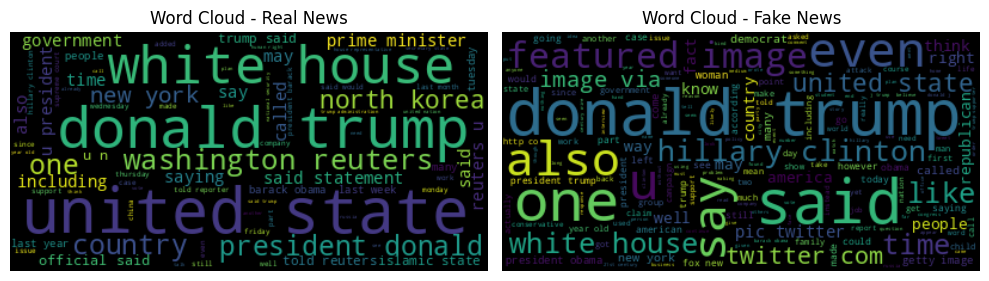

In [41]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')  # Download necessary NLTK resources

# Combine the cleaned text for real news articles
real_text_combined = ' '.join(real_news['cleaned_text'])

# Combine the cleaned text for fake news articles
fake_text_combined = ' '.join(fake_news['cleaned_text'])

# Set stopwords for word cloud generation
stopwords = set(stopwords.words('english'))

# Generate word cloud for real news articles
wordcloud_real = WordCloud(stopwords=stopwords).generate(real_text_combined)

# Generate word cloud for fake news articles
wordcloud_fake = WordCloud(stopwords=stopwords).generate(fake_text_combined)

# Plot the word clouds
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud - Real News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud - Fake News')
plt.axis('off')

plt.tight_layout()
plt.show()


In [42]:
from nltk.util import ngrams

# Set the value of n for n-gram analysis
n = 2  # Change the value of n as desired (e.g., 2 for bigrams, 3 for trigrams)

# Generate n-grams for real news articles
real_tokens = nltk.word_tokenize(real_text_combined)
real_ngrams = ngrams(real_tokens, n)
real_ngrams_freqdist = nltk.FreqDist(real_ngrams)

# Generate n-grams for fake news articles
fake_tokens = nltk.word_tokenize(fake_text_combined)
fake_ngrams = ngrams(fake_tokens, n)
fake_ngrams_freqdist = nltk.FreqDist(fake_ngrams)

# Print the most common n-grams for real news articles
print("Most common n-grams in real news articles:")
most_common_real = real_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_real:
    print(f"{ngram}: {frequency}")

print('\n\n')

# Print the most common n-grams for fake news articles
print("Most common n-grams in fake news articles:")
most_common_fake = fake_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_fake:
    print(f"{ngram}: {frequency}")


Most common n-grams in real news articles:
('united', 'states'): 12198
('donald', 'trump'): 10135
('white', 'house'): 8418
('washington', 'reuters'): 6679
('president', 'donald'): 5930
('north', 'korea'): 5659
('new', 'york'): 4740
('prime', 'minister'): 4206
('u', 'president'): 3948
('said', 'statement'): 3943



Most common n-grams in fake news articles:
('donald', 'trump'): 14131
('featured', 'image'): 7699
('hillary', 'clinton'): 7248
('white', 'house'): 6742
('united', 'states'): 6658
('twitter', 'com'): 6557
('image', 'via'): 6333
('pic', 'twitter'): 6148
('new', 'york'): 4352
('president', 'obama'): 4083


In [96]:
n = 3

# Generate n-grams for fake news articles
fake_tokens = nltk.word_tokenize(fake_text_combined)
fake_ngrams = ngrams(fake_tokens, n)
fake_ngrams_freqdist = nltk.FreqDist(fake_ngrams)

# Print the most common n-grams for real news articles
print("Most common n-grams in real news articles:")
most_common_real = real_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_real:
    print(f"{ngram}: {frequency}")

print('\n\n')

# Print the most common n-grams for fake news articles
print("Most common n-grams in fake news articles:")
most_common_fake = fake_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_fake:
    print(f"{ngram}: {frequency}")

Most common n-grams in real news articles:
('united', 'states'): 12198
('donald', 'trump'): 10135
('white', 'house'): 8418
('washington', 'reuters'): 6679
('president', 'donald'): 5930
('north', 'korea'): 5659
('new', 'york'): 4740
('prime', 'minister'): 4206
('u', 'president'): 3948
('said', 'statement'): 3943



Most common n-grams in fake news articles:
('pic', 'twitter', 'com'): 6148
('featured', 'image', 'via'): 5719
('donald', 'j', 'trump'): 2156
('21st', 'century', 'wire'): 1924
('j', 'trump', 'realdonaldtrump'): 1692
('new', 'york', 'times'): 1565
('black', 'lives', 'matter'): 1200
('president', 'united', 'states'): 1009
('president', 'donald', 'trump'): 959
('news', '21st', 'century'): 943


In [97]:
n = 4

# Generate n-grams for fake news articles
fake_tokens = nltk.word_tokenize(fake_text_combined)
fake_ngrams = ngrams(fake_tokens, n)
fake_ngrams_freqdist = nltk.FreqDist(fake_ngrams)

# Print the most common n-grams for real news articles
print("Most common n-grams in real news articles:")
most_common_real = real_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_real:
    print(f"{ngram}: {frequency}")

print('\n\n')

# Print the most common n-grams for fake news articles
print("Most common n-grams in fake news articles:")
most_common_fake = fake_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_fake:
    print(f"{ngram}: {frequency}")

Most common n-grams in real news articles:
('united', 'states'): 12198
('donald', 'trump'): 10135
('white', 'house'): 8418
('washington', 'reuters'): 6679
('president', 'donald'): 5930
('north', 'korea'): 5659
('new', 'york'): 4740
('prime', 'minister'): 4206
('u', 'president'): 3948
('said', 'statement'): 3943



Most common n-grams in fake news articles:
('donald', 'j', 'trump', 'realdonaldtrump'): 1692
('news', '21st', 'century', 'wire'): 939
('21st', 'century', 'wire', 'say'): 729
('image', 'via', 'video', 'screen'): 660
('featured', 'image', 'via', 'video'): 638
('via', 'video', 'screen', 'capture'): 632
('getty', 'images', 'donald', 'trump'): 592
('www', 'youtube', 'com', 'watch'): 575
('http', 'www', 'youtube', 'com'): 569
('youtube', 'com', 'watch', 'v'): 548


In [98]:
n = 5

# Generate n-grams for fake news articles
fake_tokens = nltk.word_tokenize(fake_text_combined)
fake_ngrams = ngrams(fake_tokens, n)
fake_ngrams_freqdist = nltk.FreqDist(fake_ngrams)

# Print the most common n-grams for real news articles
print("Most common n-grams in real news articles:")
most_common_real = real_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_real:
    print(f"{ngram}: {frequency}")

print('\n\n')

# Print the most common n-grams for fake news articles
print("Most common n-grams in fake news articles:")
most_common_fake = fake_ngrams_freqdist.most_common(10)  # Change '10' to the desired number of most common n-grams
for ngram, frequency in most_common_fake:
    print(f"{ngram}: {frequency}")

Most common n-grams in real news articles:
('united', 'states'): 12198
('donald', 'trump'): 10135
('white', 'house'): 8418
('washington', 'reuters'): 6679
('president', 'donald'): 5930
('north', 'korea'): 5659
('new', 'york'): 4740
('prime', 'minister'): 4206
('u', 'president'): 3948
('said', 'statement'): 3943



Most common n-grams in fake news articles:
('image', 'via', 'video', 'screen', 'capture'): 627
('http', 'www', 'youtube', 'com', 'watch'): 569
('www', 'youtube', 'com', 'watch', 'v'): 548
('featured', 'image', 'via', 'video', 'screen'): 520
('21wire', 'subscribe', 'become', 'member', '21wire'): 471
('subscribe', 'become', 'member', '21wire', 'tv'): 465
('featured', 'image', 'via', 'screen', 'capture'): 378
('member', '21wire', 'tv', '21st', 'century'): 359
('21wire', 'tv', '21st', 'century', 'wire'): 353
('tv', '21st', 'century', 'wire', 'say'): 351


<ipython-input-100-b7f71b9898be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_news['article_length'] = real_news['cleaned_text'].apply(lambda x: len(x.split()))
<ipython-input-100-b7f71b9898be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news['article_length'] = fake_news['cleaned_text'].apply(lambda x: len(x.split()))


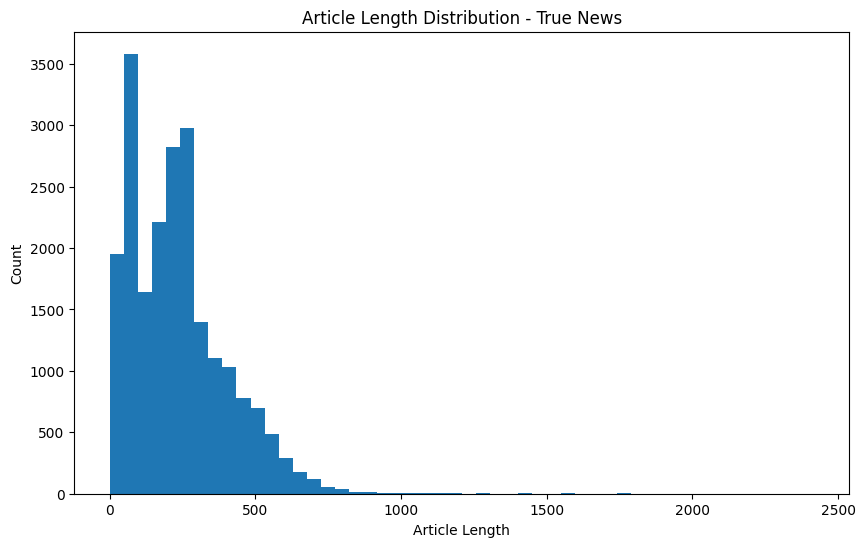

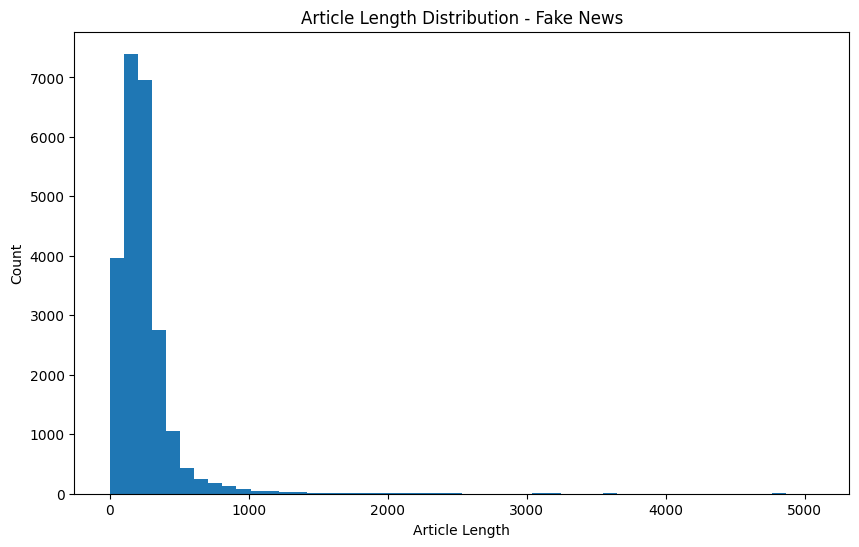

In [100]:
# Compute the length of each true news article
real_news['article_length'] = real_news['cleaned_text'].apply(lambda x: len(x.split()))

# Compute the length of each fake news article
fake_news['article_length'] = fake_news['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the distribution of article lengths for true news
plt.figure(figsize=(10, 6))
plt.hist(real_news['article_length'], bins=50)
plt.title('Article Length Distribution - True News')
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.show()

print('\n\n')
# Plot the distribution of article lengths for fake news
plt.figure(figsize=(10, 6))
plt.hist(fake_news['article_length'], bins=50)
plt.title('Article Length Distribution - Fake News')
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.show()

In [102]:
import numpy as np

# Compute the average word count for real news articles
real_avg_word_count = np.mean(real_news['cleaned_text'].apply(lambda x: len(x.split())))

# Compute the average word count for fake news articles
fake_avg_word_count = np.mean(fake_news['cleaned_text'].apply(lambda x: len(x.split())))

# Print the average word count for real and fake news articles
print(f"Average Word Count - Real News: {real_avg_word_count:.2f}")
print(f"Average Word Count - Fake News: {fake_avg_word_count:.2f}")

Average Word Count - Real News: 235.21
Average Word Count - Fake News: 243.44


In [104]:
!pip install textstat

import textstat

# Compute the readability scores for real news articles
real_readability_scores = real_news['cleaned_text'].apply(textstat.flesch_reading_ease)

# Compute the readability scores for fake news articles
fake_readability_scores = fake_news['cleaned_text'].apply(textstat.flesch_reading_ease)

# Print the average readability scores for real and fake news articles
print(f"Average Readability Score - Real News: {real_readability_scores.mean():.2f}")
print(f"Average Readability Score - Fake News: {fake_readability_scores.mean():.2f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.2 MB/s eta 0:00:00
Average Readability Score - Real News: -190.59
Average Readability Score - Fake News: -188.15


In [106]:
# Compute the vocabulary richness for real news articles
real_vocab_richness = real_news['cleaned_text'].apply(lambda x: len(set(nltk.word_tokenize(x))) / len(nltk.word_tokenize(x)) if len(nltk.word_tokenize(x)) != 0 else 0)

# Compute the vocabulary richness for fake news articles
fake_vocab_richness = fake_news['cleaned_text'].apply(lambda x: len(set(nltk.word_tokenize(x))) / len(nltk.word_tokenize(x)) if len(nltk.word_tokenize(x)) != 0 else 0)

# Print the average vocabulary richness for real and fake news articles
print(f"Average Vocabulary Richness - Real News: {real_vocab_richness.mean():.2f}")
print(f"Average Vocabulary Richness - Fake News: {fake_vocab_richness.mean():.2f}")


Average Vocabulary Richness - Real News: 0.73
Average Vocabulary Richness - Fake News: 0.72


In [43]:
import random

df = df.sample(frac=1, random_state=42)  # Shuffle the rows of the DataFrame
df.reset_index(drop=True, inplace=True)  # Reset the index of the shuffled DataFrame


In [44]:
df.drop(columns='Label',axis=1,inplace=True)
df.head()

,label_encode,cleaned_text
0,0,21st century wire say ben stein reputable prof...
1,1,washington reuters u president donald trump re...
2,1,reuters puerto rico governor ricardo rossello ...
3,0,monday donald trump embarrassed country accide...
4,1,glasgow scotland reuters u presidential candid...


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Preprocess the data
# Assuming the preprocessed text is stored in the 'cleaned_text' column
texts = df['cleaned_text'].values
labels = df['label_encode'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text and convert it to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_sequence_length = 500  # Specify the maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the CNN model
embedding_dim = 100  # Specify the dimensionality of the word embeddings
num_filters = 128  # Specify the number of filters in the convolutional layer

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters=num_filters, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64  # Specify the batch size
epochs = 10  # Specify the number of epochs

model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/10
562/562 [==============================] - 112s 181ms/step - loss: 0.0779 - accuracy: 0.9717 - val_loss: 0.0089 - val_accuracy: 0.9979
Epoch 2/10
562/562 [==============================] - 59s 105ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0064 - val_accuracy: 0.9980
Epoch 3/10
562/562 [==============================] - 37s 66ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 4/10
562/562 [==============================] - 23s 42ms/step - loss: 5.9917e-04 - accuracy: 0.9999 - val_loss: 0.0163 - val_accuracy: 0.9961
Epoch 5/10
562/562 [==============================] - 20s 35ms/step - loss: 7.3994e-04 - accuracy: 0.9999 - val_loss: 0.0086 - val_accuracy: 0.9986
Epoch 6/10
562/562 [==============================] - 18s 31ms/step - loss: 7.0137e-04 - accuracy: 0.9999 - val_loss: 0.0097 - val_accuracy: 0.9986
Epoch 7/10
562/562 [==============================] - 12s 21ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0082 